In [1]:
#Make essential imports
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import pandas as pd

# Problem formulation:

Inputs: Volts, Ampers

Output: Battery time left

The idea so is to output the battery remaining time (in minutes), given

current current consumption and voltage level.

The idea is clearly explained in the following graph:

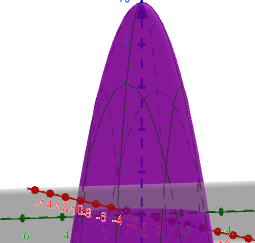

The extracted graph from the datasheet is the following:
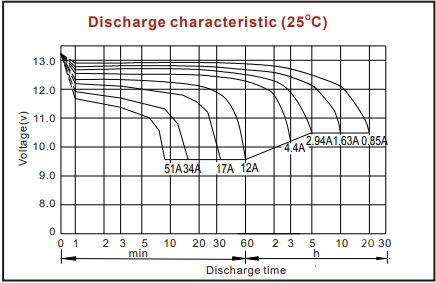

# Data creation

In [31]:
"""
Using WebPlotDigitalizer we extracted valuable information about the graph, and so constructed a dataset.
Cite:
@misc{Rohatgi2022,
  url = {https://automeris.io/WebPlotDigitizer},
  author = {Rohatgi,  Ankit},
  title = {Webplotdigitizer: Version 4.6},
  year = {2022}
}
"""
#Load the datasets
first = pd.read_csv('datasets/0-1.csv')
second = pd.read_csv('datasets/1-2.csv')
third = pd.read_csv('datasets/2-3.csv')
fourth = pd.read_csv('datasets/3-5.csv')
fifth = pd.read_csv('datasets/5-10.csv')
sixth = pd.read_csv('datasets/10-20.csv')
seventh = pd.read_csv('datasets/20-30.csv')
eighth = pd.read_csv('datasets/30-60.csv')
ninth = pd.read_csv('datasets/60-120.csv')
tenth = pd.read_csv('datasets/120-180.csv')
eleventh = pd.read_csv('datasets/180-300.csv')
twelth = pd.read_csv('datasets/300-600.csv')
thirtheenth = pd.read_csv('datasets/600-1200.csv')
dataframes = [first, second, third, fourth, fifth, sixth, seventh, eighth, ninth, tenth, eleventh, twelth, thirtheenth]

In [32]:
#We get the possible current values (the ones that the datasheet provides)
currents = [i.split('A')[0] for i in first.columns[[not('Unnamed' in i) for i in first.columns]]]
currents

['0.85', '1.63', '2.94', '4.4', '12', '17', '34', '51']

In [33]:
#Create an empty dataframe where the whole data will be dumped
df = pd.DataFrame(data={'Time':[], 'Volts':[], 'Ampers':[]})
df

,Time,Volts,Ampers


In [38]:
#This function joins every single datapoint related to a given current
def join_dataset(current:str, datasets:list):
    data_join = np.array([[0, 0, 0]])
    for dataset in datasets:
        #We first get the index of the current (ampers) column
        col_idx = np.argmax([current in i for i in dataset.columns])
        #Then we obtain the fraction of the dataset related to that current
        temp_data = dataset.iloc[1:, [col_idx, col_idx+1]].dropna().astype(float)
        col_curr = np.full(len(temp_data), float(current))
        temp_data.insert(1, 'Ampers', col_curr)
        #Finally the new data is concatenated to the one previously processed
        data_join = np.concatenate((data_join, temp_data.to_numpy()), axis=0)
    return data_join[1:]

In [49]:
full_datasets = [join_dataset(i, dataframes) for i in currents]
full_datasets

[array([[2.90015198e-02, 8.50000000e-01, 1.32030980e+01],
        [6.07877055e-02, 8.50000000e-01, 1.31977204e+01],
        [8.53497580e-02, 8.50000000e-01, 1.31874599e+01],
        ...,
        [1.03930615e+03, 8.50000000e-01, 1.11413544e+01],
        [1.03518433e+03, 8.50000000e-01, 1.11610543e+01],
        [1.03106251e+03, 8.50000000e-01, 1.11739020e+01]]),
 array([[8.77394713e-03, 1.63000000e+00, 1.31873362e+01],
        [4.05601328e-02, 1.63000000e+00, 1.31750977e+01],
        [7.23463184e-02, 1.63000000e+00, 1.31645281e+01],
        ...,
        [1.03930615e+03, 1.63000000e+00, 1.11413544e+01],
        [1.03518433e+03, 1.63000000e+00, 1.11610543e+01],
        [1.03106251e+03, 1.63000000e+00, 1.11739020e+01]]),
 array([[-8.56397232e-03,  2.94000000e+00,  1.31917866e+01],
        [ 2.32222133e-02,  2.94000000e+00,  1.31775701e+01],
        [ 4.92290925e-02,  2.94000000e+00,  1.31614993e+01],
        ...,
        [ 1.03930615e+03,  2.94000000e+00,  1.11413544e+01],
        [ 1.03518

In [59]:
thirtheenth.iloc[-2:], full_datasets[0][-220:]

(        0.85A 600-1200m          Unnamed: 1
 218   1035.184327846364  11.161054276783176
 219  1031.0625065949132  11.173902025249177,
 array([[5.91668365e+02, 8.50000000e-01, 1.21096033e+01],
        [6.17259979e+02, 8.50000000e-01, 1.20908043e+01],
        [6.26326057e+02, 8.50000000e-01, 1.20777846e+01],
        [6.32884630e+02, 8.50000000e-01, 1.20620014e+01],
        [6.41433041e+02, 8.50000000e-01, 1.20541802e+01],
        [6.46463982e+02, 8.50000000e-01, 1.20399725e+01],
        [6.56161664e+02, 8.50000000e-01, 1.20233014e+01],
        [6.65446584e+02, 8.50000000e-01, 1.20172421e+01],
        [6.66869973e+02, 8.50000000e-01, 1.20014904e+01],
        [6.76319861e+02, 8.50000000e-01, 1.19937644e+01],
        [6.81925986e+02, 8.50000000e-01, 1.19778512e+01],
        [6.89137587e+02, 8.50000000e-01, 1.19634998e+01],
        [6.95210514e+02, 8.50000000e-01, 1.19473829e+01],
        [7.04454789e+02, 8.50000000e-01, 1.19291626e+01],
        [7.10473663e+02, 8.50000000e-01, 1.19197211e

In [19]:
for i in range(len(currents)):
    df_aux = pd.DataFrame(data={'Time':full_datasets[i][:,0], 'Ampers':full_datasets[i][:,1], 'Volts': full_datasets[i][:,2]})
    df = pd.concat((df, df_aux), ignore_index=True)
df.head()

,Time,Volts,Ampers
0,0.029002,13.203098,0.85
1,0.060788,13.197720,0.85
2,0.085350,13.187460,0.85
3,0.133029,13.170647,0.85
4,0.164815,13.159954,0.85


In [20]:
# As the purpose of the model is to predict the battery's time left we have to set as the minimum voltage level
# the minimum voltage requested by the motor when turning on. This information was obtained experimenting with the motor.
# The minimum voltage is then: 10.2V
dt = df.loc[df.Volts >= 10.2].reset_index(drop=True)
dt

,Time,Volts,Ampers
0,0.029002,13.203098,0.85
1,0.060788,13.197720,0.85
2,0.085350,13.187460,0.85
3,0.133029,13.170647,0.85
4,0.164815,13.159954,0.85
...,...,...,...
8702,1116.075070,10.912664,51.00
8703,1045.488881,11.126794,51.00
8704,1039.306149,11.141354,51.00
8705,1035.184328,11.161054,51.00


In [21]:
#We have to set the remaining battery life for every current level based on how much did the battery lasted
for a in currents:
    mask = dt.Ampers == float(a)
    last_time = dt.loc[mask].Time.max()
    dt['Time'].loc[mask] = dt.loc[mask].Time.apply(lambda x: last_time-x) #The last_time-current_time gives the remaining time of the battery
dt

,Time,Volts,Ampers
0,1182.537041,13.203098,0.85
1,1182.505254,13.197720,0.85
2,1182.480692,13.187460,0.85
3,1182.433013,13.170647,0.85
4,1182.401227,13.159954,0.85
...,...,...,...
8702,66.490972,10.912664,51.00
8703,137.077161,11.126794,51.00
8704,143.259893,11.141354,51.00
8705,147.381714,11.161054,51.00


In [22]:
#We save the final data to a csv
dt.to_csv('data.csv', index=False)

# Data visualization

In [61]:
#Load the data
df = pd.read_csv('data.csv')
df.head()

,Time,Volts,Ampers
0,1182.537041,13.203098,0.85
1,1182.505254,13.197720,0.85
2,1182.480692,13.187460,0.85
3,1182.433013,13.170647,0.85
4,1182.401227,13.159954,0.85


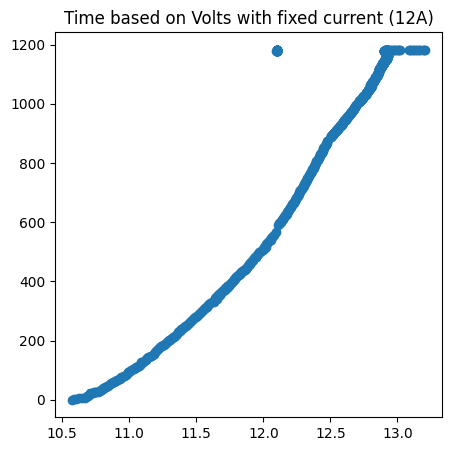

In [77]:
#Visualize the data in 2D scatterplots
data = df.to_numpy()
X = data[:, 1:]
y = data[:, 0]

figure, axis = plt.subplots(1, 1, figsize=(5, 5)) 

"""# For Ampers 
axis[0].scatter(X[:, 1], y) 
axis[0].set_title("Time based on Ampers") 
  
# For Volts 
axis[1].scatter(X[:, 0], y) 
axis[1].set_title("Time based on Volts") 

# For Watts (Volts*Ampers)
axis[2].scatter(X[:, 0]*X[:, 1], y) 
axis[2].set_title("Time based on Watts") 

# For Volts and Ampers
axis[3].scatter(X[:, 0], X[:, 1]) 
axis[3].set_title("Relationship bewtween Volts and Ampers") """

# For Volts given current = 12A
current = 12
mask = X[:, 1] == 0.85
axis.scatter(X[mask, 0], y[mask]) 
axis.set_title("Time based on Volts with fixed current (12A)") 

plt.show()

In [88]:
errors = [(y[mask] > 1000) * (X[mask, 0] < 12.2) * (X[mask, 0] > 11.5)]
lin = np.linspace(0, len(y[mask])+1, len(y[mask])+1)
errors[0]

[array([False, False, False, ..., False, False, False])]

In [70]:
X[mask, 0] > 12.5

array([ True,  True,  True, ..., False, False, False])

In [27]:
X_mask = X[mask, 0]
np.sum(X_mask<10.2)

0

In [30]:
data_current = df.loc[df.Ampers==12]
data_current.info

<bound method DataFrame.info of              Time      Volts  Ampers
4439  1182.588610  13.186362    12.0
4440  1182.560158  13.171973    12.0
4441  1182.537362  13.158450    12.0
4442  1182.522592  13.144002    12.0
4443  1182.505517  13.127133    12.0
...           ...        ...     ...
5532    66.490972  10.912664    12.0
5533   137.077161  11.126794    12.0
5534   143.259893  11.141354    12.0
5535   147.381714  11.161054    12.0
5536   151.503536  11.173902    12.0

[1098 rows x 3 columns]>

As we can see, there are no outliers and there does not seem to be any leverage point. The problem with the data is that it seems to be categorical in one axis and non-linear in another. Ampers seems to be categorical, and may be the case.

# Model fitting

In [23]:
#Load the data
df = pd.read_csv('data.csv')
df.head()

,Time,Volts,Ampers
0,1182.537041,13.203098,0.85
1,1182.505254,13.197720,0.85
2,1182.480692,13.187460,0.85
3,1182.433013,13.170647,0.85
4,1182.401227,13.159954,0.85


In [26]:
#Setting up the data
data = df.to_numpy()
y = data[:, 0]
X = data[:, 1:]

In [33]:
#Normalize the data
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
X = (X-mean)/std

In [51]:
#Helper function
def mean_diff(y_true:np.array, y_pred:np.array):
    return np.mean(abs(y_true-y_pred))

In [52]:
#We will first fit a linear regression to the data (the most basic model)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
kfold = KFold(n_splits = 5, shuffle=True, random_state=42)

MSE = 0
for train, test in kfold.split(X, y):
    lin_reg.fit(X[train], y[train])
    MSE += mean_diff(y[test], lin_reg.predict(X[test]))
MSE/5 #This gives the average r2 score

222.40270591729632

In [57]:
#As the R2 score was not good enough we create more predictors (for example Watts, Volts*Ampers)
watts = np.array([X[:, 0]*X[:, 1]])

max_degree = 50
loss = np.array([0]*(max_degree-1))

for i in range(2, max_degree+1):
    X_new = np.concatenate((X, watts.T), axis=1)

    #Feature engineering
    for j in range(i):
        data_exp = X[:]**j
        X_new = np.concatenate((X_new, data_exp), axis=1)
    

    #Kfold evaluation
    for train, test in kfold.split(X_new, y):
        lin_reg.fit(X_new[train], y[train])
        loss[i-2] += mean_diff(y[test], lin_reg.predict(X_new[test]))

loss/5, 'Best degree: '+ str(np.argmin(loss))

(array([215.8, 219.8, 209.6, 203.8, 200.4, 198.4, 197. , 197.6, 195.4,
        195.4, 193.6, 193.8, 194. , 193. , 193. , 193. , 192.8, 192.4,
        192. , 192. , 192. , 191.4, 191.4, 191.2, 191.2, 191.2, 194.2,
        192. , 195. , 193.6, 194.6, 202.8, 213. , 207.6, 201.6, 318. ,
        450. , 230. , 249.6, 252.6, 253. , 257.8, 261.8, 262.6, 264.6,
        266.6, 267.2, 269.2, 269.6]),
 'Best degree: 23')